In [2]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import  classification_report

In [ ]:
!git clone https://github.com/asimali004/PlantDoc-Dataset.git

Cloning into 'PlantDoc-Dataset'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 2670 (delta 23), reused 41 (delta 22), pack-reused 2628
Receiving objects: 100% (2670/2670), 932.92 MiB | 17.48 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Checking out files: 100% (2581/2581), done.


In [ ]:
import shutil
os.mkdir("/content/PlantDoc-Dataset/test/Tomato two spotted spider mites leaf")
shutil.move("/content/PlantDoc-Dataset/train/Tomato two spotted spider mites leaf/SpotSpeckBlightMite-1l4v879.jpg",
            "/content/PlantDoc-Dataset/test/Tomato two spotted spider mites leaf/SpotSpeckBlightMite-1l4v879.jpg")

'/content/PlantDoc-Dataset/test/Tomato two spotted spider mites leaf/SpotSpeckBlightMite-1l4v879.jpg'

In [ ]:
file_path = '/content/PlantDoc-Dataset/train'

In [ ]:
name_class = os.listdir(file_path)
name_class

['Corn Gray leaf spot',
 'Cherry leaf',
 'Apple leaf',
 'Apple rust leaf',
 'Blueberry leaf',
 'Tomato leaf',
 'Bell_pepper leaf',
 'Soyabean leaf',
 'Potato leaf early blight',
 'Tomato mold leaf',
 'Squash Powdery mildew leaf',
 'grape leaf',
 'Tomato leaf mosaic virus',
 'Tomato Early blight leaf',
 'Bell_pepper leaf spot',
 'Tomato two spotted spider mites leaf',
 'Corn rust leaf',
 'Tomato leaf bacterial spot',
 'Corn leaf blight',
 'Peach leaf',
 'Tomato leaf late blight',
 'Raspberry leaf',
 'Tomato leaf yellow virus',
 'Potato leaf late blight',
 'Strawberry leaf',
 'Tomato Septoria leaf spot',
 'grape leaf black rot',
 'Apple Scab Leaf']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
train = pd.concat([filepath, labels], axis=1)
train = train.sample(frac=1).reset_index(drop=True)
train.head(5)

,Filepath,Label
0,/content/PlantDoc-Dataset/train/Cherry leaf/Bi...,Cherry leaf
1,/content/PlantDoc-Dataset/train/Cherry leaf/tr...,Cherry leaf
2,/content/PlantDoc-Dataset/train/Corn rust leaf...,Corn rust leaf
3,/content/PlantDoc-Dataset/train/Apple Scab Lea...,Apple Scab Leaf
4,/content/PlantDoc-Dataset/train/Tomato Septori...,Tomato Septoria leaf spot


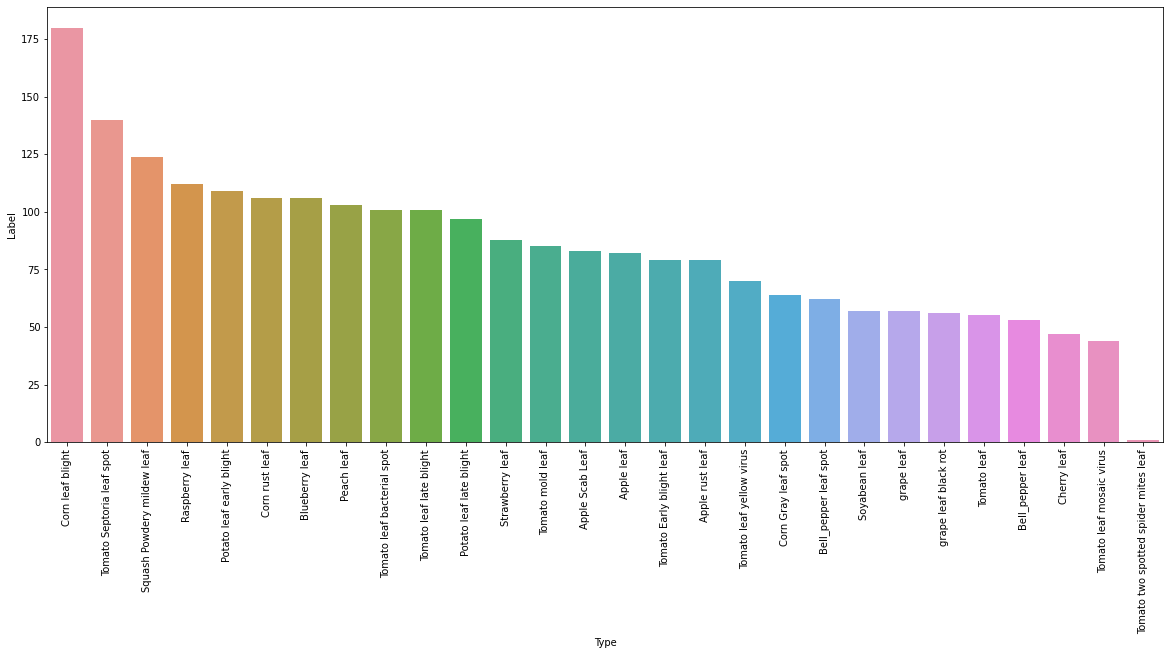

In [ ]:
plt.figure(figsize=(20,8))
counts = train.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
file_path = '/content/PlantDoc-Dataset/test'

In [ ]:
name_class = os.listdir(file_path)
name_class

['Corn Gray leaf spot',
 'Cherry leaf',
 'Apple leaf',
 'Apple rust leaf',
 'Blueberry leaf',
 'Tomato leaf',
 'Bell_pepper leaf',
 'Soyabean leaf',
 'Potato leaf early blight',
 'Tomato mold leaf',
 'Squash Powdery mildew leaf',
 'grape leaf',
 'Tomato leaf mosaic virus',
 'Tomato Early blight leaf',
 'Bell_pepper leaf spot',
 'Tomato two spotted spider mites leaf',
 'Corn rust leaf',
 'Tomato leaf bacterial spot',
 'Corn leaf blight',
 'Peach leaf',
 'Tomato leaf late blight',
 'Raspberry leaf',
 'Tomato leaf yellow virus',
 'Potato leaf late blight',
 'Strawberry leaf',
 'Tomato Septoria leaf spot',
 'grape leaf black rot',
 'Apple Scab Leaf']

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
test = pd.concat([filepath, labels], axis=1)
test = test.sample(frac=1).reset_index(drop=True)
test.head(5)

,Filepath,Label
0,/content/PlantDoc-Dataset/test/grape leaf blac...,grape leaf black rot
1,/content/PlantDoc-Dataset/test/grape leaf blac...,grape leaf black rot
2,/content/PlantDoc-Dataset/test/grape leaf blac...,grape leaf black rot
3,/content/PlantDoc-Dataset/test/Tomato leaf mos...,Tomato leaf mosaic virus
4,/content/PlantDoc-Dataset/test/Apple rust leaf...,Apple rust leaf


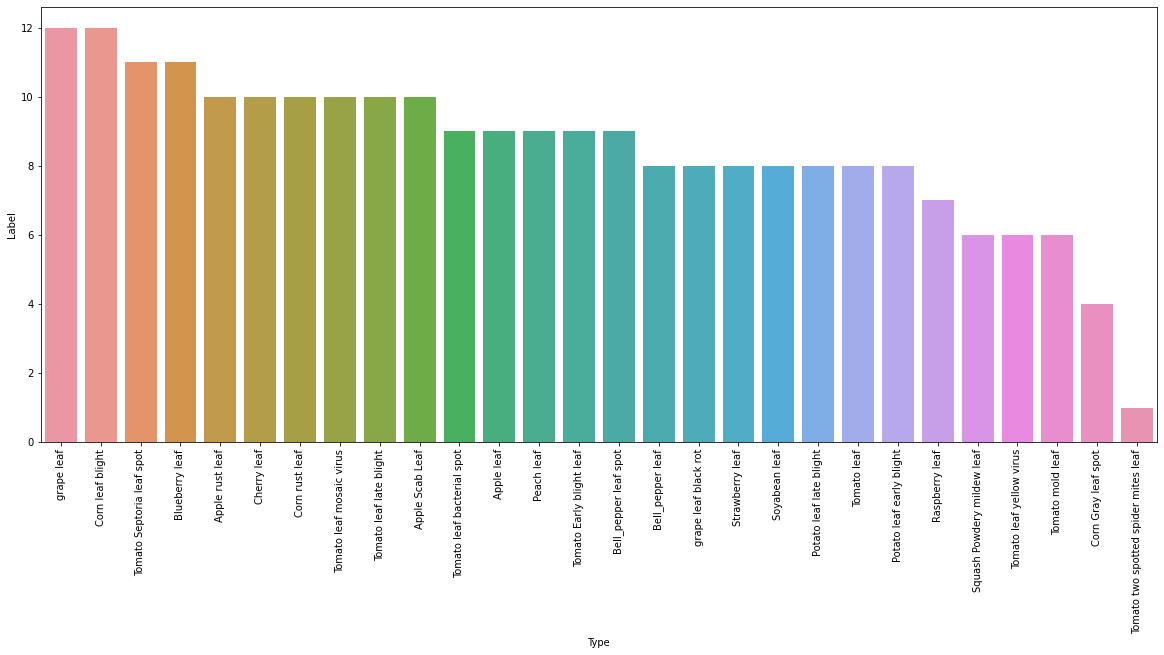

In [ ]:
plt.figure(figsize=(20,8))
counts = test.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
print(train.shape,test.shape)

(2341, 2) (237, 2)


<Figure size 432x288 with 0 Axes>

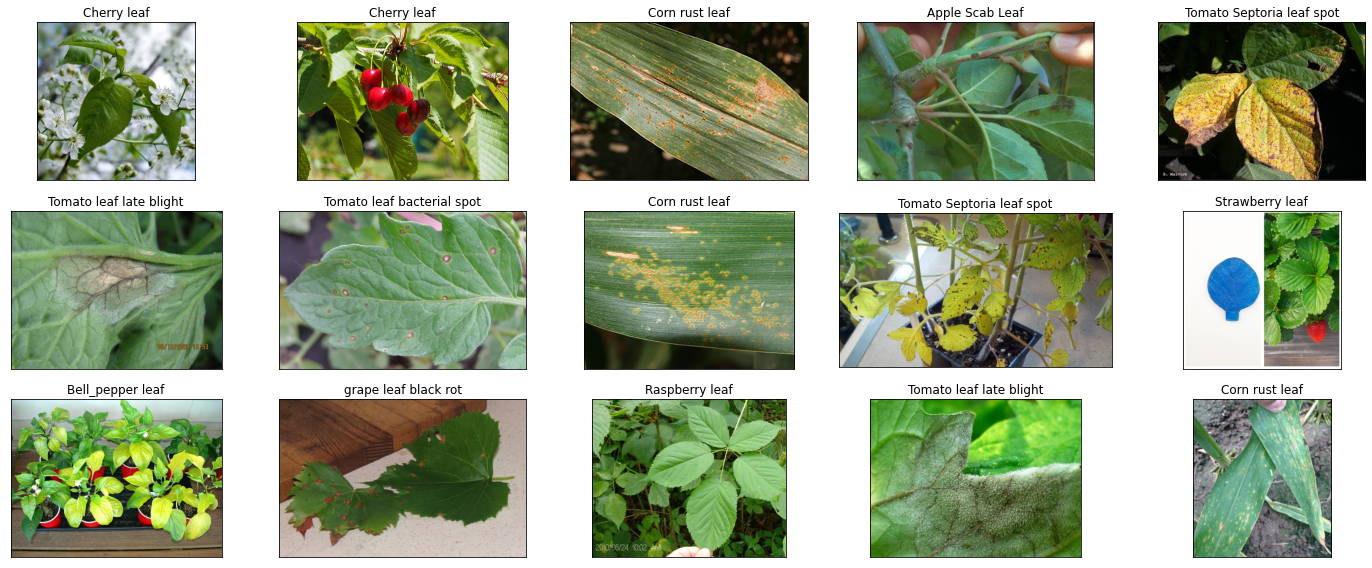

In [ ]:
plt.gray()
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train.Filepath[i]),cmap="gray",vmin=0,vmax=255)
    ax.set_title(train.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2341 validated image filenames belonging to 28 classes.
Found 2341 validated image filenames belonging to 28 classes.
Found 237 validated image filenames belonging to 28 classes.


In [ ]:
pretrained_model = InceptionV3(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(28, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
#    validation_data=valid_gen,
    epochs=10,
 #   callbacks=my_callbacks
)

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred)
print(cf_matrix)

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()